# Data Cleaning:

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
#Import dataset
import numpy as np
import pandas as pd
import datetime
data = pd.read_csv("marketing_campaign.csv", sep="\t")
#Count for number of data
print("Number of data:", len(data))
data.head()

Number of data: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
#Check the info and features of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data = data.dropna()
print("Length of clean dataset is", len(data))

Length of clean dataset is 2216


# Data Preprocessing:

## I want to see the oldest to the newest record:

In [7]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y')
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
print("The newest customer recorded is", max(dates))
print("The oldest customer recorded is", min(dates))

The newest customer recorded is 2014-06-29
The oldest customer recorded is 2012-07-30


In [8]:
print("Categories of Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Categories of Education:\n", data["Education"].value_counts())

Categories of Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Categories of Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [9]:
#Created "Customer_For" to check how often they go to market
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [10]:
#Generate new dataset with features we will use
data["Age"] = 2023-data["Year_Birth"]
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data["Children"]=data["Kidhome"]+data["Teenhome"]
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [11]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  3.054423e+16   
std        0.244950      0.115588     0.096907     0.357417  1.749036e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  1.555200e+16   
50%        0.000000      0.000000     0.000000     0.000000  3.071520e+16   
75%        0.000000      0.000000     0.000000     0.000000  4.570560e+16   
max        1.000000      1.000000     1.000000     1.000000  6.039360e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     54.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      27.000000     5.000000     0.000000     1.000000     0.000000  
25%      46.000000    69.000000     0.000000     2.000000     0.000000  
50%      53.000000   396.500000     1.000000     3.000000     1.000000  
75%      64.000000  1048.000000     1.000000     3.000000     1.000000  
max     130.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

<Figure size 640x480 with 0 Axes>

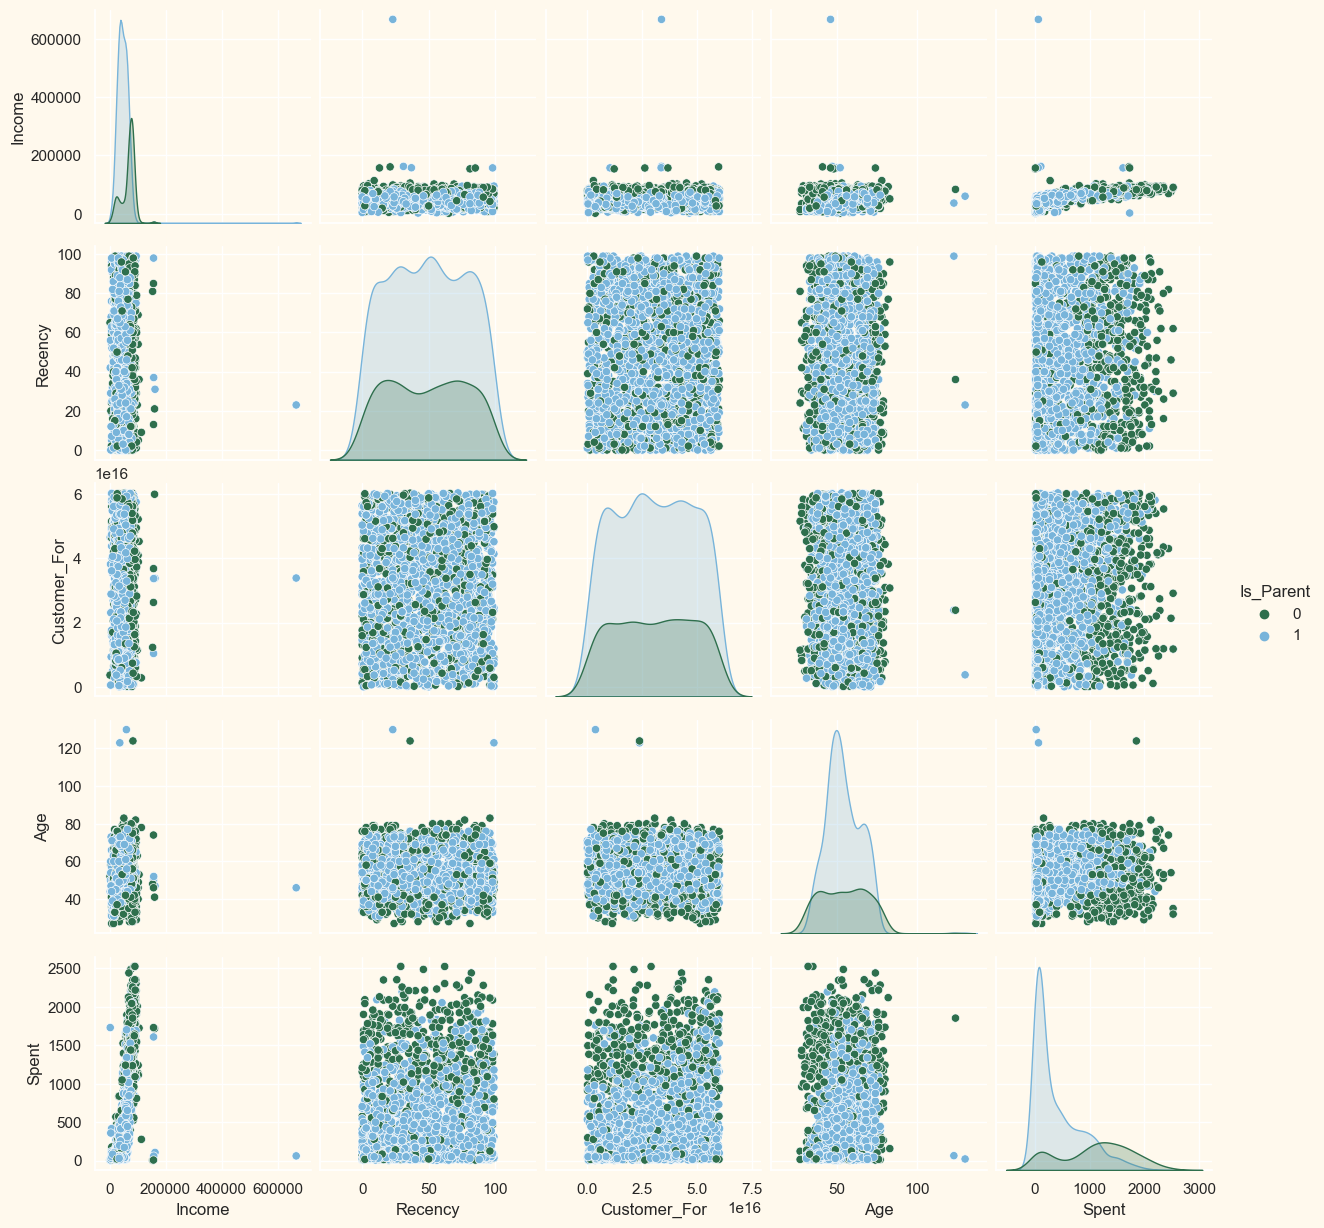

In [12]:
#Plot some potential analyzed features
sns.set(rc={"axes.facecolor":"#fff9ed","figure.facecolor":"#fff9ed"})
pallet = ["#2E6F4D", "#4B8E5D", "#6FAE6E", "#4774B4", "#5C8CC7", "#78B4DA"]
cmap = colors.ListedColormap(["#2E6F4D", "#4B8E5D", "#6FAE6E", "#4774B4", "#5C8CC7", "#78B4DA"])
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#2E6F4D","#78B4DA"]))
plt.show()

#### *we need to remove some outliers

In [13]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


## Explore the correlation

<AxesSubplot:>

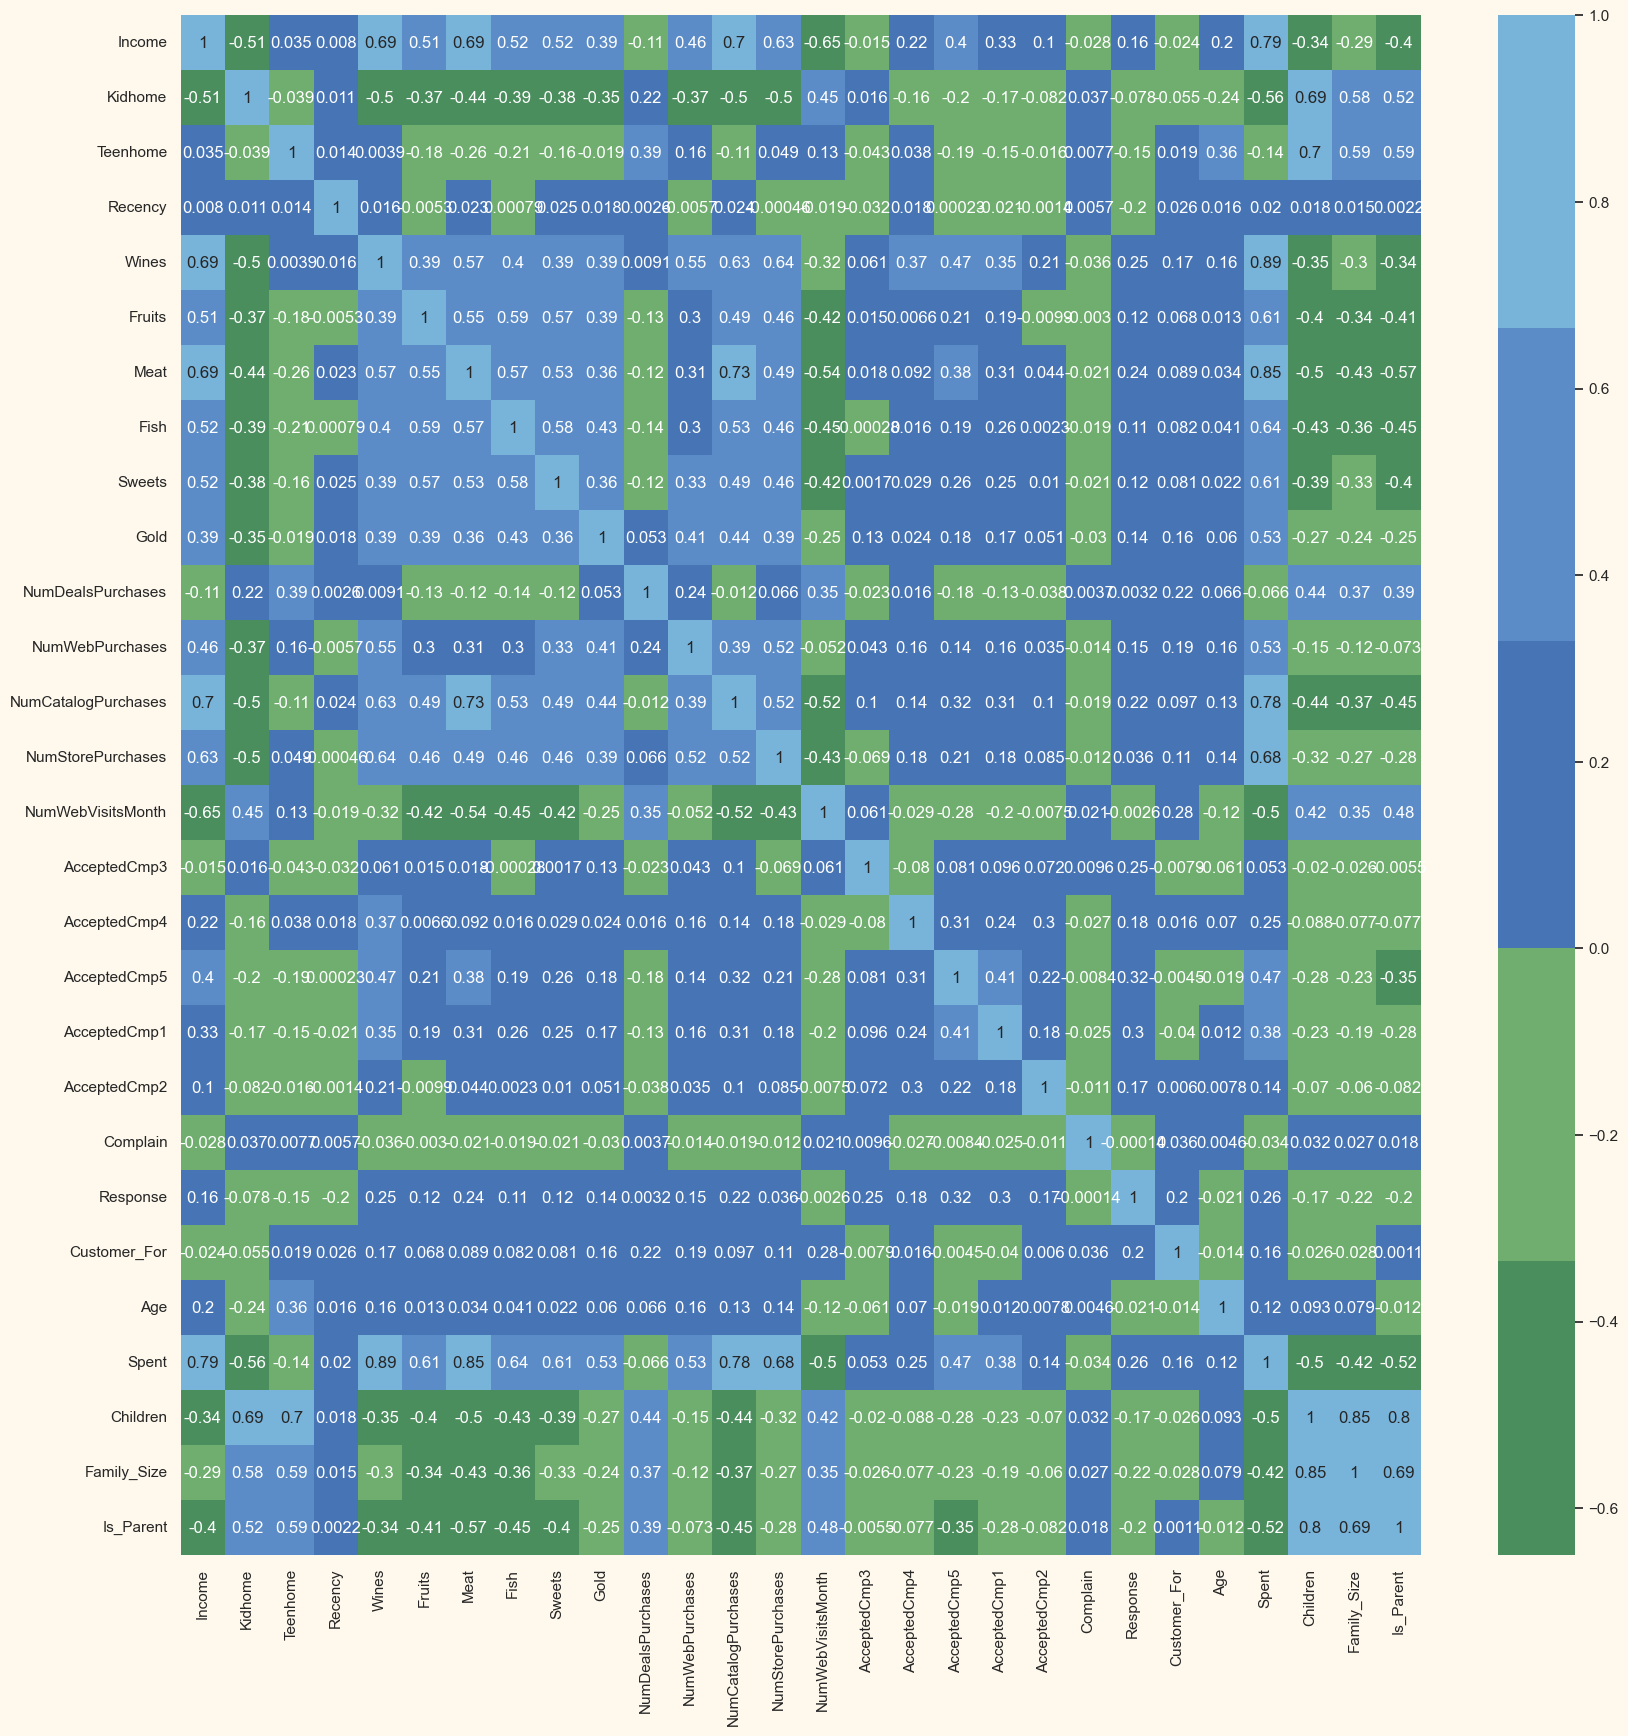

In [14]:
#Correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [25]:
threshold = 0.7
positive_corr_features = []
for col in corrmat.columns:
    if col != 'Income' and corrmat['Income'][col] > threshold:
        positive_corr_features.append(col)
print("Features with the highest positive correlation:")
print(positive_corr_features)

Features with the highest positive correlation:
['Spent']


In [26]:
threshold = -0.4
negative_corr_features = []

for col in corrmat.columns:
    if col != 'Income' and corrmat['Income'][col] < threshold:
        negative_corr_features.append(col)
print("Features with the highest negative correlation:")
print(negative_corr_features)


Features with the highest negative correlation:
['Kidhome', 'NumWebVisitsMonth', 'Is_Parent']


In [16]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [124]:
#Check if all features are numerical
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in object_cols:
    data[i] = LE.fit_transform(data[i])
print("All features are now numerical")

All features are now numerical


In [125]:
#Check if all features are now scaled
from sklearn.preprocessing import StandardScaler
ds = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [127]:
#Final dataset for modeling
scaled_ds.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.527721  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.189011  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.206048  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.060584 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.951915 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

In [128]:
#Save our final dataset in file
scaled_ds.to_excel('data_after_datacleaning.xlsx', index=False)

# Dimentionality Reduction Using PCA

#### *Since this is an unsupervised learning, I will use PCA for the dimentionality reduction

In [129]:
#Since this is an unsupervised learning, I will use PCA for the dimentionality reduction
#reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -3.212219e-17  2.878602 -5.978123 -2.539470 -0.781595  2.386380   
col2  2212.0 -6.424437e-17  1.709469 -4.194757 -1.323932 -0.173716  1.234923   
col3  2212.0  3.252371e-17  1.231685 -3.625184 -0.853556 -0.051292  0.863841   

           max  
col1  7.452915  
col2  6.168185  
col3  6.746845

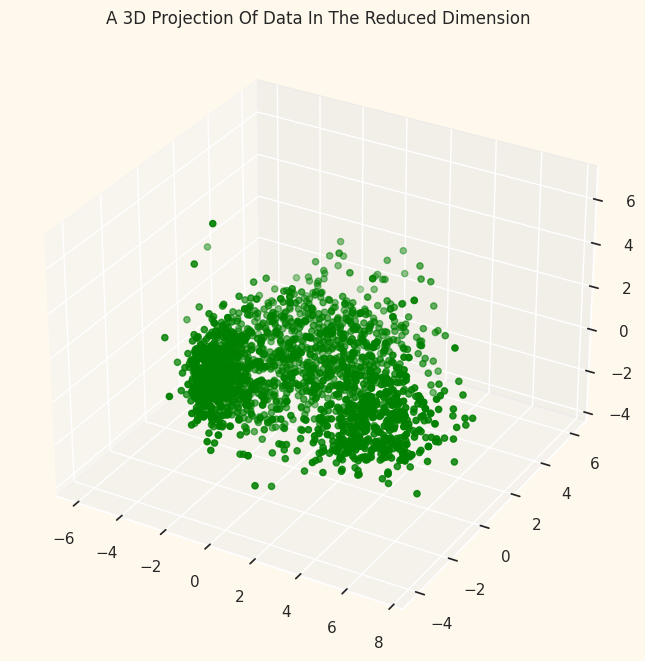

In [130]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

## Elbow method to determine the clusters

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

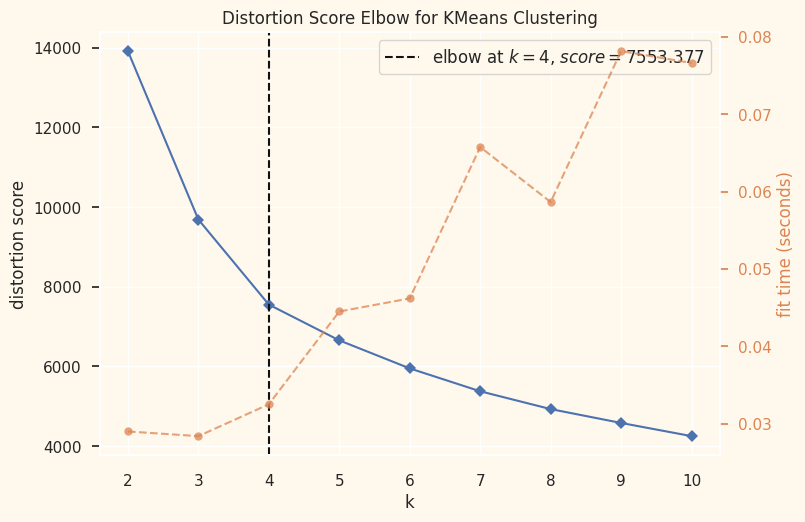

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [131]:
# Use elbow method to find numbers of clusters we should make
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

#### So, I think we can use k = 4

## Form the cluster

### Model Selection:

In [132]:
# I used three methods: single, completen, and ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Create Agglomerative Clustering models with different linkage methods
AC_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
AC_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
AC_single = AgglomerativeClustering(n_clusters=4, linkage='single')

# Fit models and predict clusters
yhat_complete = AC_complete.fit_predict(PCA_ds)
yhat_ward = AC_ward.fit_predict(PCA_ds)
yhat_single = AC_single.fit_predict(PCA_ds)

PCA_ds["Clusters_com"] = yhat_complete
#Adding the Clusters feature to the orignal dataframe.
data["Clusters_com"]= yhat_complete
PCA_ds["Clusters_ward"] = yhat_ward
#Adding the Clusters feature to the orignal dataframe.
data["Clusters_ward"]= yhat_ward
PCA_ds["Clusters_single"] = yhat_single
#Adding the Clusters feature to the orignal dataframe.
data["Clusters_single"]= yhat_single

# Calculate evaluation metrics for the 'complete' linkage model
silhouette_complete = silhouette_score(PCA_ds, yhat_complete)
ari_complete = adjusted_rand_score(data["Clusters_com"], yhat_complete)  # Replace 'true_labels' with actual labels if available

# Calculate evaluation metrics for the 'ward' linkage model
silhouette_ward = silhouette_score(PCA_ds, yhat_ward)
ari_ward = adjusted_rand_score(data["Clusters_ward"], yhat_ward)  # Replace 'true_labels' with actual labels if available

# Calculate evaluation metrics for the 'single' linkage model
silhouette_single = silhouette_score(PCA_ds, yhat_single)
ari_single = adjusted_rand_score(data["Clusters_single"], yhat_single)  # Replace 'true_labels' with actual labels if available

# Print evaluation results
print("Complete Linkage - Silhouette Score:", silhouette_complete)
print("Complete Linkage - Adjusted Rand Index:", ari_complete)
print("\nWard Linkage - Silhouette Score:", silhouette_ward)
print("Ward Linkage - Adjusted Rand Index:", ari_ward)
print("\nSingle Linkage - Silhouette Score:", silhouette_single)
print("Single Linkage - Adjusted Rand Index:", ari_single)


Complete Linkage - Silhouette Score: 0.29633869817706165
Complete Linkage - Adjusted Rand Index: 1.0

Ward Linkage - Silhouette Score: 0.4562282281470672
Ward Linkage - Adjusted Rand Index: 1.0

Single Linkage - Silhouette Score: 0.28744275750371184
Single Linkage - Adjusted Rand Index: 1.0


#### *Based on the result, the ward method is the best model for clustering my dataset. It is because it has a highest silhouette score, indicating it forms best-defined cluster segementaion among the three. Also, the adjusted rand index indicates great similarity between the true lables and the clustering results.

## Visualize and compare the three clusters:

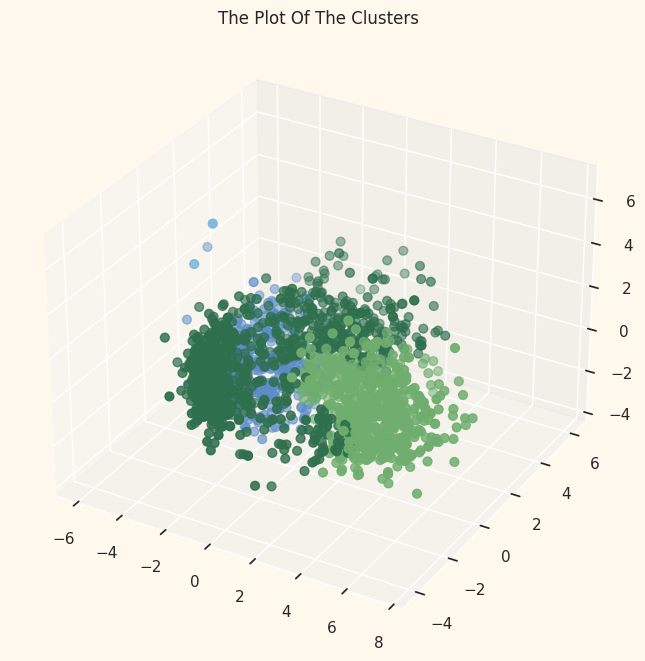

In [133]:
#Plotting the clusters
cmap = colors.ListedColormap(["#2E6F4D", "#4B8E5D", "#6FAE6E", "#4774B4", "#5C8CC7", "#78B4DA"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters_com"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

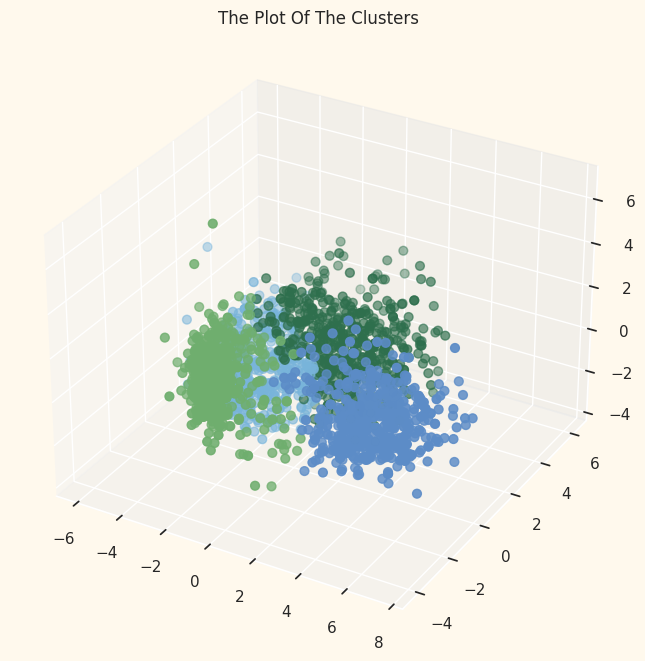

In [134]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters_ward"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

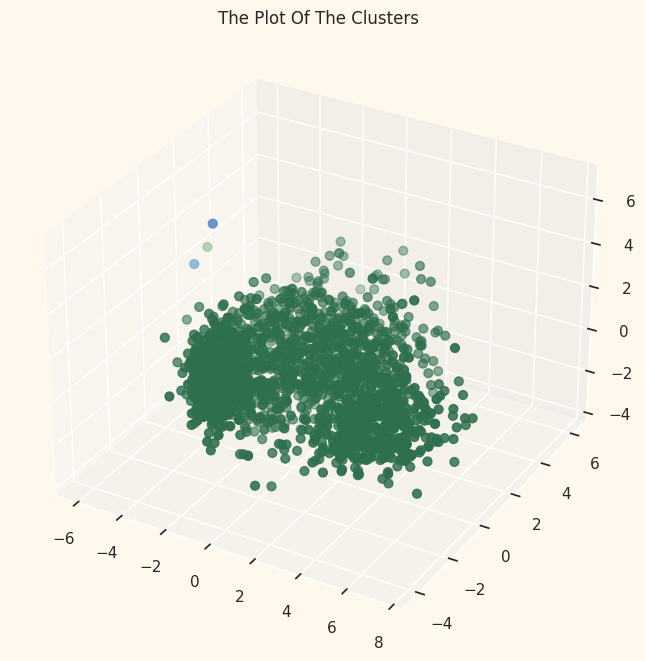

In [136]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters_single"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Evaluating the Cluster Model

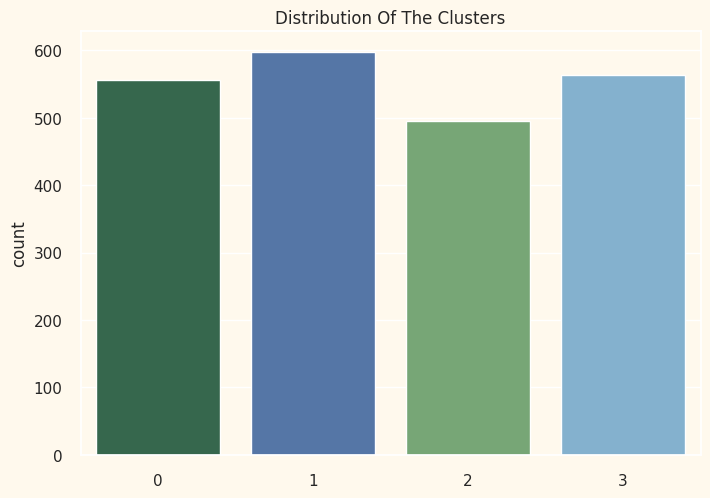

In [137]:
pal = ["#2E6F4D", "#4774B4", '#6FAE6E', "#78B4DA"]
pl = sns.countplot(x=yhat_ward, palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

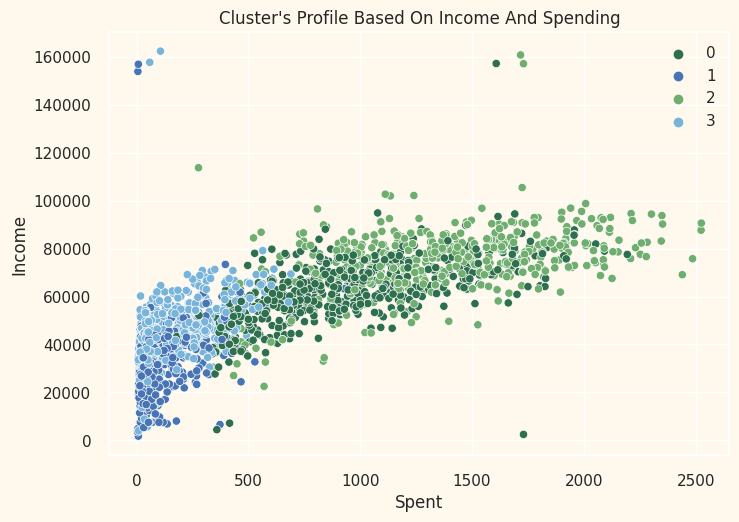

In [138]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters_ward"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

#### *From the visulization, we can see that spending increases with the income. It is pretty interesting that though group 1 and group 3 has similar spending, group 0 has higher income. For future promotion strategy, we can put more efforts on how to make group 4 spend more.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 74.2% of the points cannot be plac

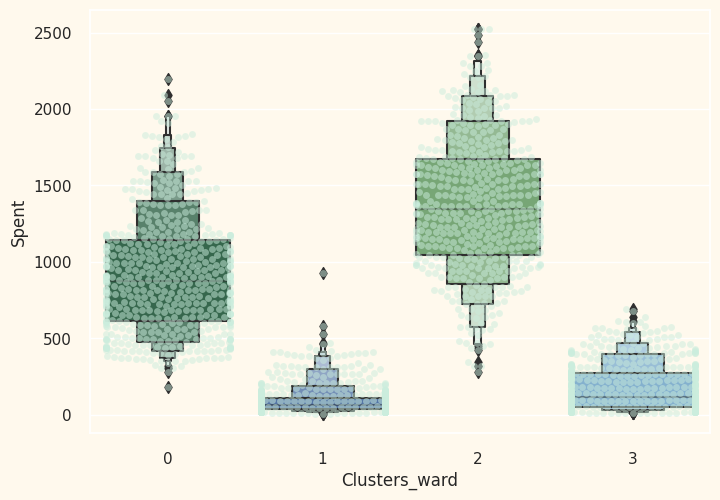

In [139]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters_ward"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters_ward"], y=data["Spent"], palette=pal)
plt.show()

### How our campaign did in the past:

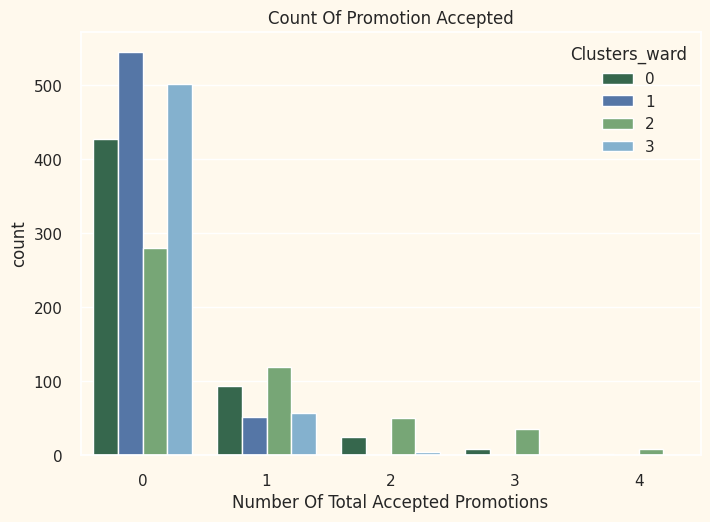

In [140]:
#Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters_ward"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

#### *Group 2, who has the most income and spending, they used promotions more frequent. So we could further analyze why they used the most of promotion. Are the promotion more accessible to this group? Or just because they are the gorup who likes the store and willing to engage with the activities? I suppose they are the group which the store has the best customer management.

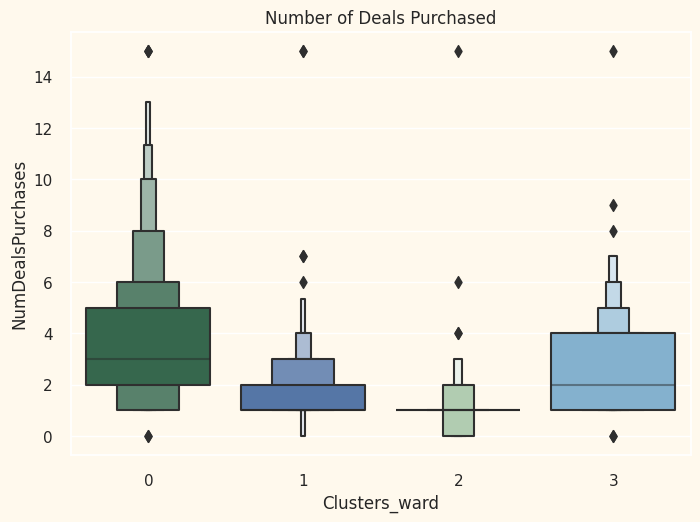

In [141]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters_ward"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

#### *Interestingly, group 2 didn't make many of the deals with discount though they accepted the most of promotions. While group 0 and 3 made deals with discount more frequently.

# Profiling

##To see the customer profiling in our 4 clusters, we will plot the features one by one.

<Figure size 800x550 with 0 Axes>

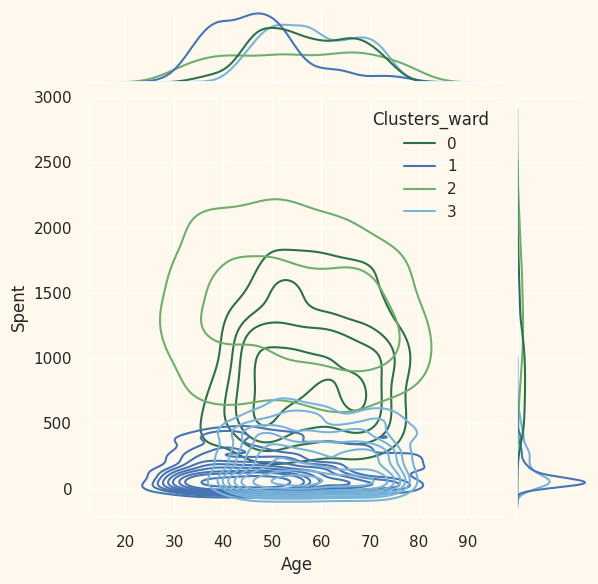

<Figure size 800x550 with 0 Axes>

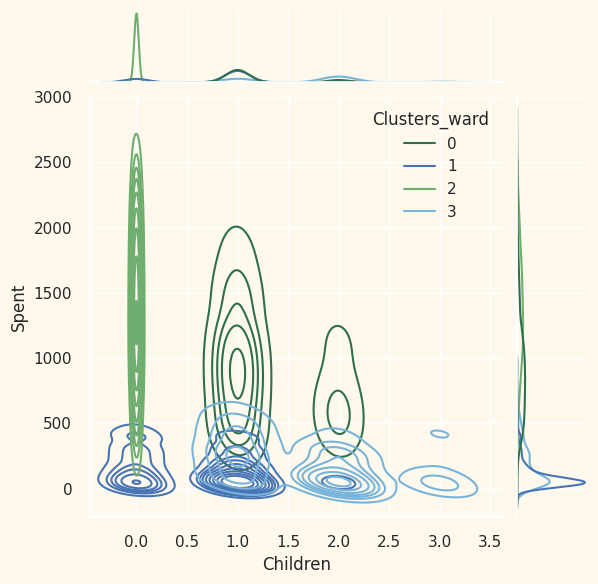

<Figure size 800x550 with 0 Axes>

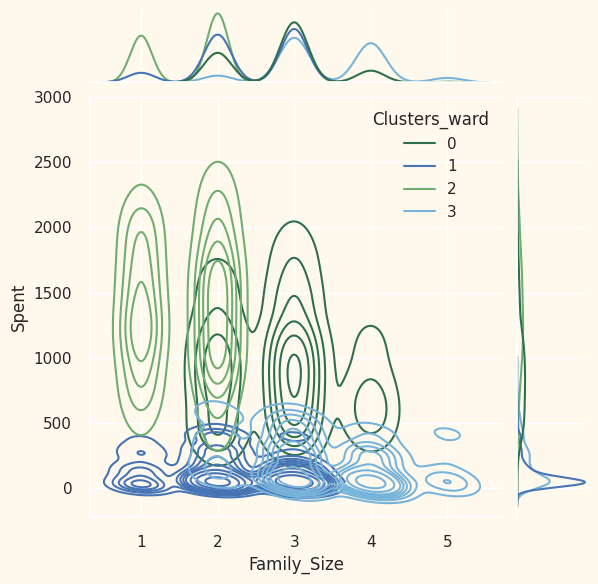

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

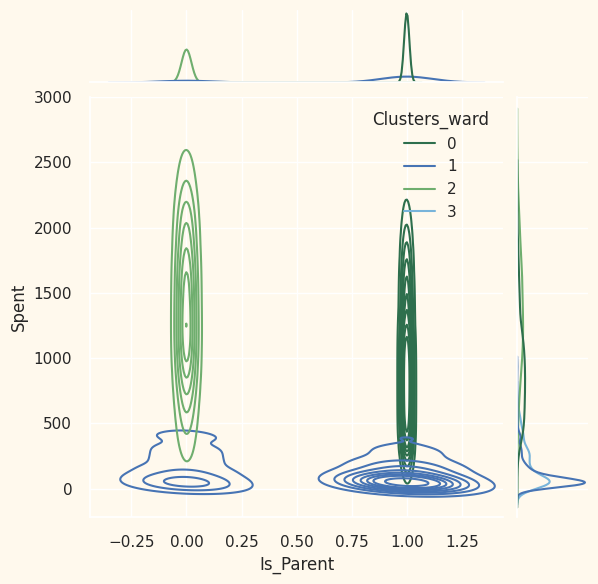

<Figure size 800x550 with 0 Axes>

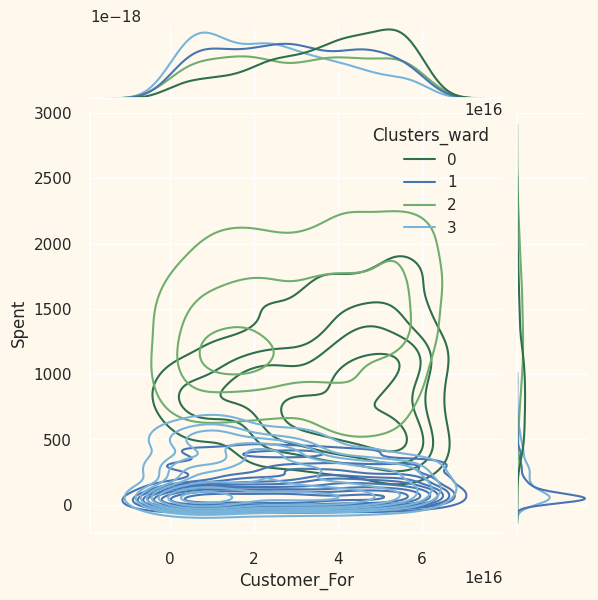

<Figure size 800x550 with 0 Axes>

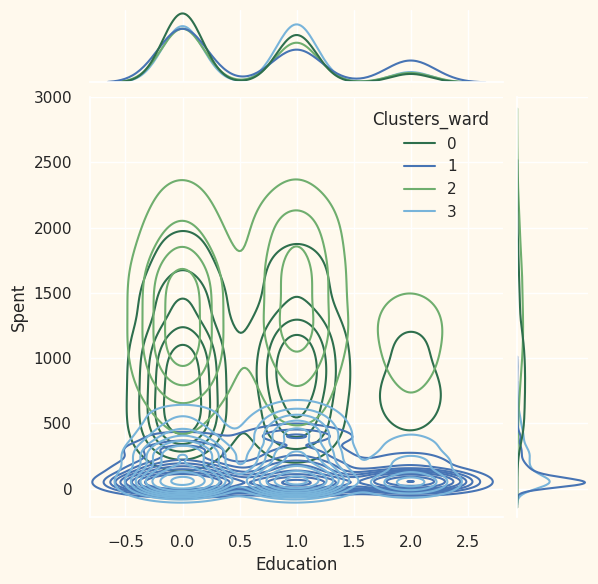

<Figure size 800x550 with 0 Axes>

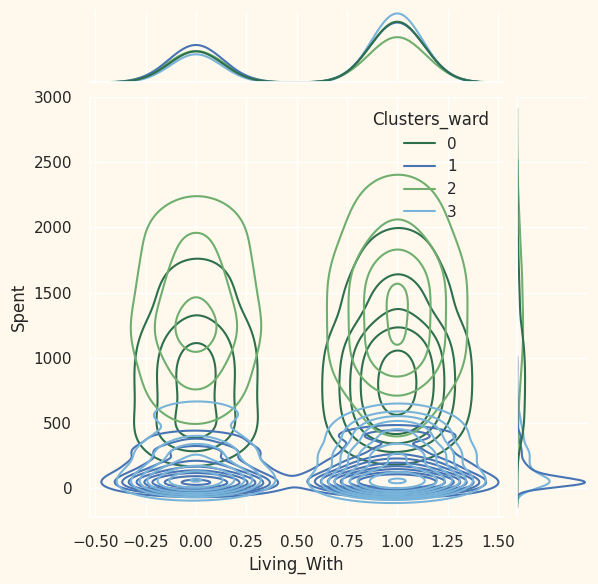

<Figure size 800x550 with 0 Axes>

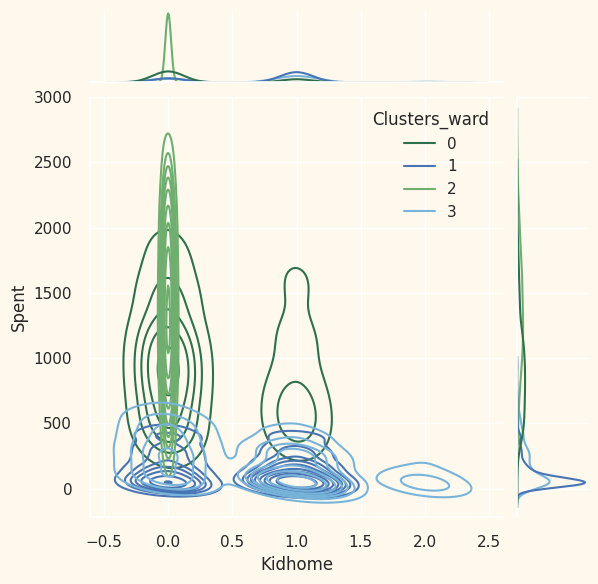

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

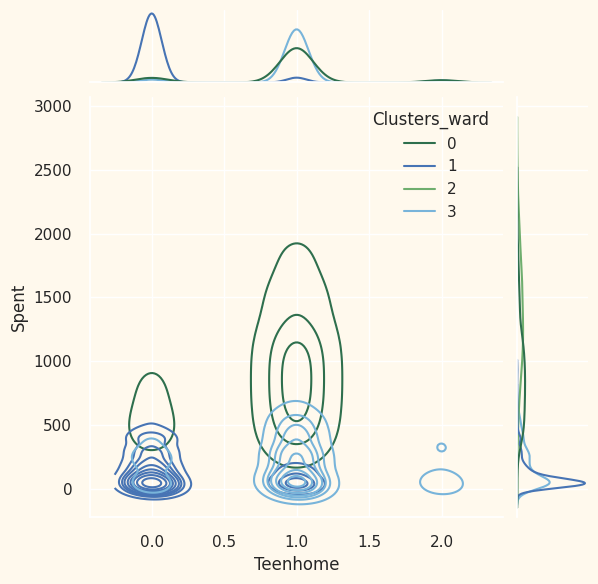

In [143]:
profiling = ["Age","Children","Family_Size","Is_Parent","Customer_For","Education","Living_With","Kidhome","Teenhome"]
for i in profiling:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters_ward"], kind="kde", palette=pal)
    plt.show()

##From the plots above, we can conclude what are the personal traits of customers in our 4 clusters:









###Cluster 0: 1.Are parents 2.Age relatively older 30-70 3.With teenkids 1-2 4.Family size 2-4
###Cluster 1: 1.Most of them are parents 2.Age relatively younger 20-80 3.With kid 1 4.Family size 1-3
###Cluster 2: 1.Not Parents 2.Age all 3.With no kid 4.Family size 1-2
###Cluster 3: 1.Are parents 2.Age relatively older 40-80 3.With kid 1-3 and with teenagers 4.Family size 2-5
